### Imports & Setup

In [15]:
import os
os.getcwd()


'C:\\Users\\HP\\Desktop\\chi-limited-analysis-py311\\notebooks'

In [16]:
import os
import pandas as pd
import numpy as np
import sqlite3
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set working directory to project root (important!)
os.chdir(r"C:\Users\HP\Desktop\chi-limited-analysis-py311")
print("Working directory:", os.getcwd())

# Plot style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ All libraries imported successfully!")


Working directory: C:\Users\HP\Desktop\chi-limited-analysis-py311
✅ All libraries imported successfully!


In [17]:
def save_plot(filename):
    """Saves the current plot to docs/images/ and shows it"""
    filepath = f"docs/images/{filename}.png"
    plt.savefig(filepath, dpi=150)
    print(f"✅ Saved plot: {filepath}")
    plt.show()


### Connect to SQL Database


In [19]:
DB_PATH = 'chi_limited.db'  # database file in project root
conn = sqlite3.connect(DB_PATH)
print("✅ Connected to database!")

# Test query
test_query = "SELECT COUNT(*) as total_rows FROM fact_sales"
result = pd.read_sql_query(test_query, conn)
print(f"📊 Total sales transactions: {result['total_rows'][0]:,}")




✅ Connected to database!
📊 Total sales transactions: 89,856


### Load Tables

In [20]:
df_product = pd.read_sql_query("SELECT * FROM dim_product", conn)
df_geography = pd.read_sql_query("SELECT * FROM dim_geography", conn)
df_time = pd.read_sql_query("SELECT * FROM dim_time", conn)
df_sales = pd.read_sql_query("SELECT * FROM fact_sales", conn)
df_promotions = pd.read_sql_query("SELECT * FROM fact_promotions", conn)
df_inventory = pd.read_sql_query("SELECT * FROM fact_inventory", conn)

print("✅ All tables loaded!")
print("Table Shapes:")
print(f"Products: {df_product.shape}, Sales: {df_sales.shape}, Inventory: {df_inventory.shape}")



✅ All tables loaded!
Table Shapes:
Products: (48, 9), Sales: (89856, 10), Inventory: (44928, 8)


#### Quick Data Profiling

In [21]:
print("📦 PRODUCT DATA PROFILE")
print(df_product.head())
print(df_product.info())
print(df_product.isnull().sum())


📦 PRODUCT DATA PROFILE
        product_id                  product_name    brand category  \
0  JC-CV100-OR-200     Chivita 100% Orange 200ml  Chivita    Juice   
1  JC-CV100-OR-500     Chivita 100% Orange 500ml  Chivita    Juice   
2   JC-CV100-OR-1L        Chivita 100% Orange 1L  Chivita    Juice   
3  JC-CV100-AP-500      Chivita 100% Apple 500ml  Chivita    Juice   
4  JC-CV100-PI-500  Chivita 100% Pineapple 500ml  Chivita    Juice   

   pack_size_ml pack_format target_segment  unit_price_ngn_2024  \
0           200       Tetra         Family               400.00   
1           500       Tetra         Family               850.00   
2          1000       Tetra         Family              1500.00   
3           500       Tetra        Premium               900.00   
4           500       Tetra         Family               880.00   

   cogs_percentage  
0             0.58  
1             0.56  
2             0.55  
3             0.57  
4             0.56  
<class 'pandas.core.frame.D

In [22]:
print("📦 SALES DATA PROFILE")
print(df_sales.head())
print(df_sales.info())
print(df_sales.isnull().sum())


📦 SALES DATA PROFILE
  transaction_id   week_id       product_id region_id         channel_id  \
0     TXN-000001  2022-W01  JC-CV100-OR-200    RG-LAG       Modern_Trade   
1     TXN-000002  2022-W01  JC-CV100-OR-200    RG-LAG  Traditional_Trade   
2     TXN-000003  2022-W01  JC-CV100-OR-200    RG-SWE       Modern_Trade   
3     TXN-000004  2022-W01  JC-CV100-OR-200    RG-SWE  Traditional_Trade   
4     TXN-000005  2022-W01  JC-CV100-OR-200    RG-SEA       Modern_Trade   

   units_sold  revenue_ngn  cost_of_goods_sold  promo_discount_ngn  \
0         538    215200.00           124816.00                0.00   
1        1599    639600.00           370968.00                0.00   
2         491    196400.00           113912.00                0.00   
3        1262    504800.00           292784.00                0.00   
4         374    149600.00            86768.00                0.00   

   baseline_demand  
0              573  
1             1375  
2              503  
3             120

In [23]:
print("📦 INVENTORY DATA PROFILE")
print(df_inventory.head())
print(df_inventory.info())
print(df_inventory.isnull().sum())


📦 INVENTORY DATA PROFILE
   inventory_id   week_id       product_id region_id  opening_stock_units  \
0             1  2022-W01  JC-CV100-OR-200    RG-LAG                12407   
1             2  2022-W01  JC-CV100-OR-200    RG-SWE                 6147   
2             3  2022-W01  JC-CV100-OR-200    RG-SEA                 7918   
3             4  2022-W01  JC-CV100-OR-200    RG-SSO                 6613   
4             5  2022-W01  JC-CV100-OR-200    RG-NCE                 4613   

   closing_stock_units  stockout_days  inventory_holding_cost_ngn  
0                10270              0                     9105.69  
1                 4394              0                     4232.62  
2                 6445              0                     5767.30  
3                 5373              0                     4812.84  
4                 3511              0                     3262.10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44928 entries, 0 to 44927
Data columns (total 8 column

### Visualizations

In [12]:
def save_plot(filename):
    """Saves the current matplotlib plot to docs/images/ and shows it"""
    plt.savefig(f'docs/images/{filename}.png', dpi=150)
    plt.show()


##### - Weekly Revenue Trend

✅ Saved plot: docs/images/weekly_revenue_trend.png


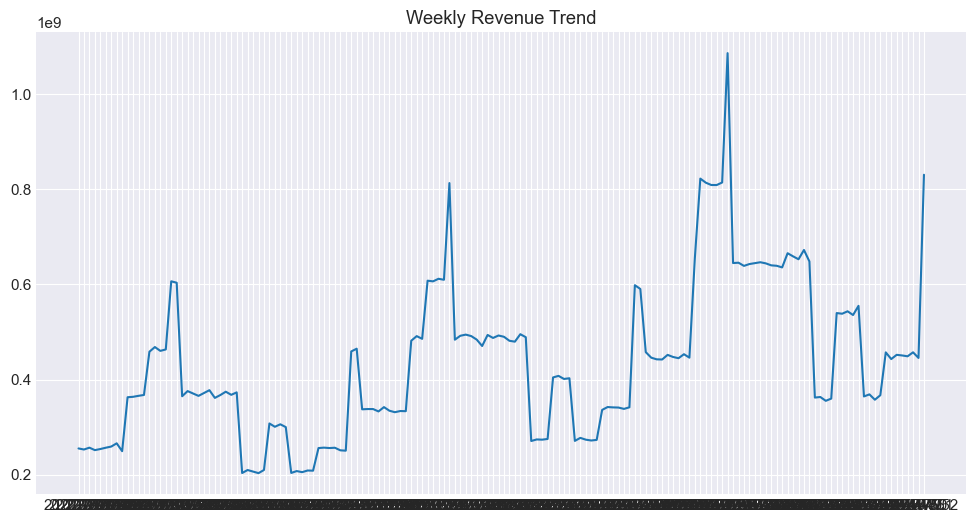

In [24]:
plt.figure(figsize=(12,6))
weekly_revenue = df_sales.groupby('week_id')['revenue_ngn'].sum().reset_index()
plt.plot(weekly_revenue['week_id'], weekly_revenue['revenue_ngn'])
plt.title("Weekly Revenue Trend")
save_plot('weekly_revenue_trend')



##### - Revenue by Category

✅ Saved plot: docs/images/revenue_by_category.png


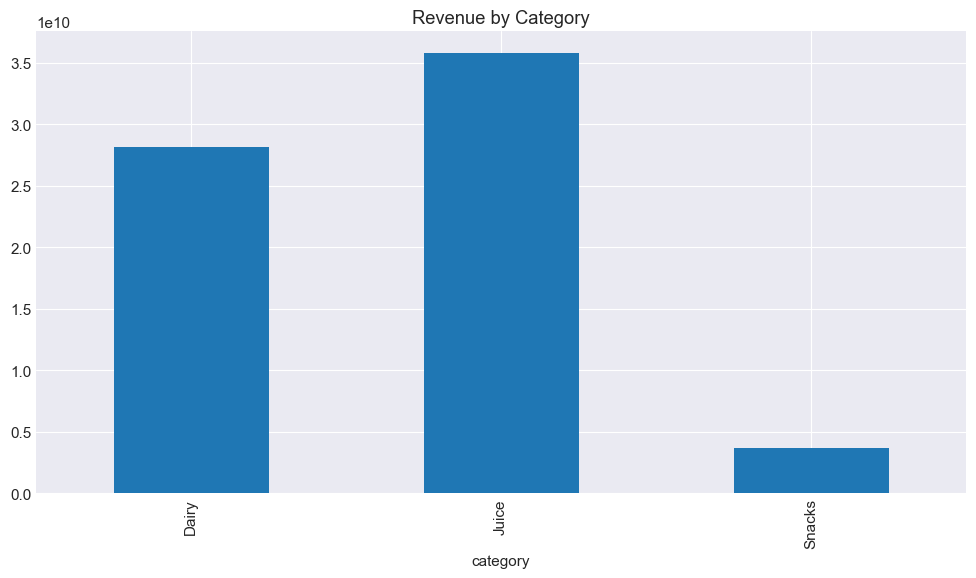

In [25]:
plt.figure(figsize=(12,6))
category_rev = df_sales.merge(df_product, on='product_id').groupby('category')['revenue_ngn'].sum()
category_rev.plot(kind='bar')
plt.title("Revenue by Category")
save_plot('revenue_by_category')


##### - Revenue by Region

✅ Saved plot: docs/images/revenue_by_region.png


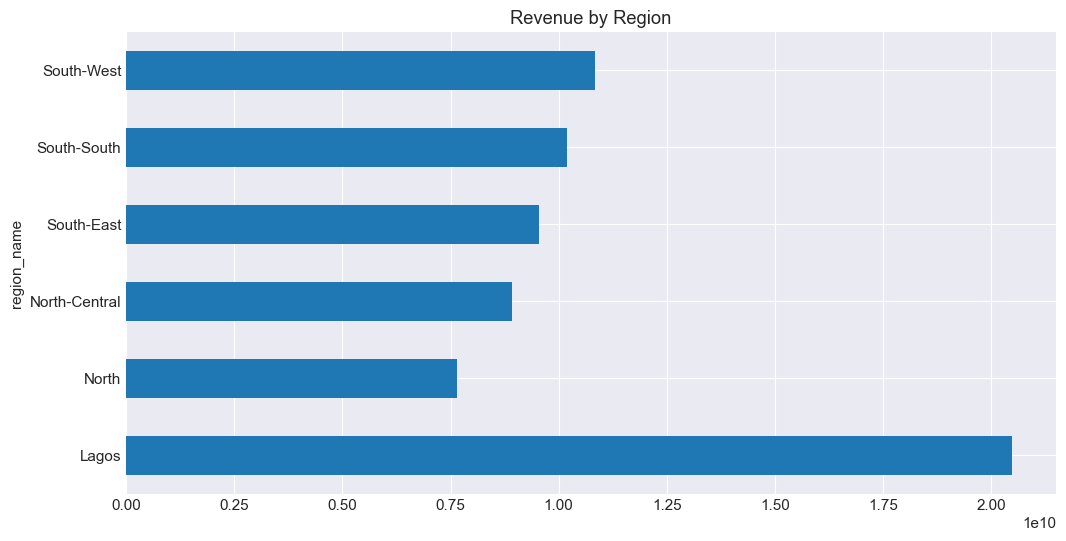

In [26]:
plt.figure(figsize=(12,6))
region_rev = df_sales.merge(df_geography, on='region_id').groupby('region_name')['revenue_ngn'].sum()
region_rev.plot(kind='barh')
plt.title("Revenue by Region")
save_plot('revenue_by_region')


##### - Units Sold Distribution

✅ Saved plot: docs/images/units_sold_distribution.png


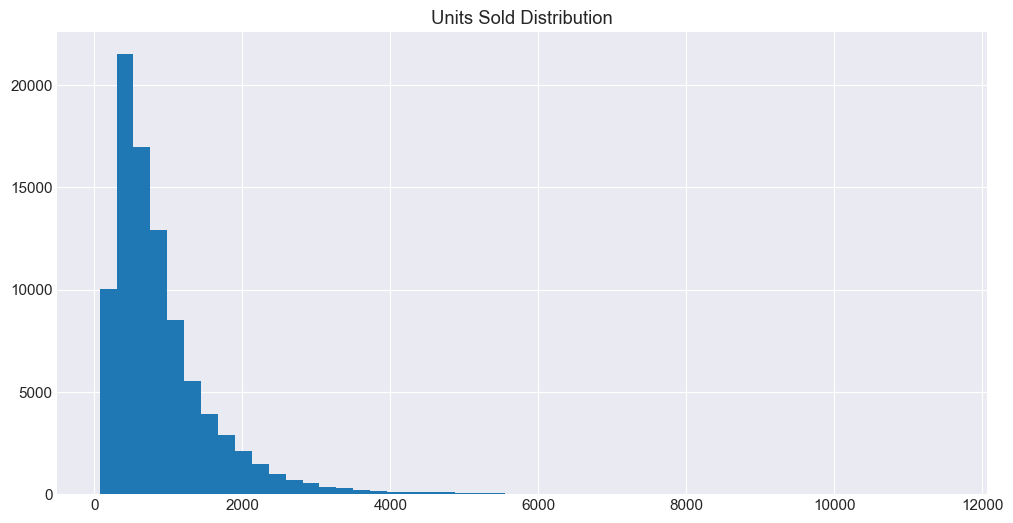

In [27]:
plt.figure(figsize=(12,6))
plt.hist(df_sales['units_sold'], bins=50)
plt.title("Units Sold Distribution")
save_plot('units_sold_distribution')


##### - Revenue by Year and Category

✅ Saved plot: docs/images/revenue_by_year_category.png


<Figure size 1200x600 with 0 Axes>

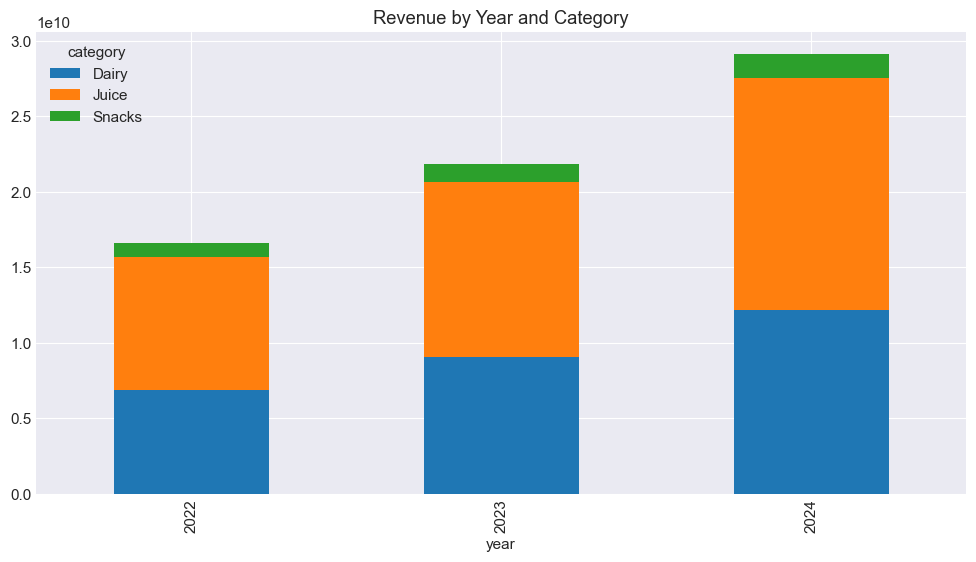

In [28]:
plt.figure(figsize=(12,6))
# Merge sales + product + time to get 'year'
df_full = df_sales.merge(df_product, on='product_id') \
                  .merge(df_time[['week_id', 'year']], on='week_id', how='left')
year_cat_rev = df_full.groupby(['year', 'category'])['revenue_ngn'].sum().unstack()
year_cat_rev.plot(kind='bar', stacked=True)
plt.title("Revenue by Year and Category")
save_plot('revenue_by_year_category')


#### Summary Statistics

In [29]:
summary_stats = pd.DataFrame({
    'Metric': ['Total Revenue', 'Average Units Sold', 'Total Transactions'],
    'Value': [df_sales['revenue_ngn'].sum(), df_sales['units_sold'].mean(), len(df_sales)]
})
summary_stats.to_csv('docs/summary_statistics.csv', index=False)
print("✅ Summary statistics saved!")



✅ Summary statistics saved!


In [30]:
conn.close()
print("✅ Database connection closed")



✅ Database connection closed
